# APPLICATION OF MACHINE LEARNING PROJECT 1

### 22CS30027
### Golla Meghanandh Manvith Prabhash

project on Linear Regression

In [1]:
#import all the required Libraries
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the CSV File 
data = pd.read_csv('./data_insurance.csv')

In [3]:
#Printing The Head Part of Data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Analysing the Data Given in the CSV File
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Printing the Data Types of the Data
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#Check is any Data NULL or Not
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
#Drop Rows With NULL Values
data = data.dropna()

In [8]:
#Encoder Function
def encoder(data,i):
    uc = np.unique(data[i])
    if(len(uc)==2):
        data[i] = np.where(data[i] == uc[0], 0, data[i])
        data[i] = np.where(data[i] == uc[1], 1, data[i])
    elif(len(uc)==4) :
        data[i] = np.where(data[i] == uc[0], 0, data[i])
        data[i] = np.where(data[i] == uc[1], 1, data[i])
        data[i] = np.where(data[i] == uc[2], 2, data[i])
        data[i] = np.where(data[i] == uc[3], 3, data[i])
    return data

In [9]:
#Encoding for Sex field
data = encoder(data,'sex')

#Encoding for Smoker field
data= encoder(data,'smoker')

#Encoding for Region field
data = encoder(data,'region')

In [10]:
#Splitting data as Input Features and Output Features
X = data.drop('charges', axis=1)
y = data['charges']

In [11]:
#min-max scalling function
def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled

In [12]:
#calling min-max scalling function
X = min_max_scaler(X)

In [13]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [14]:
#Diving the X and y as Train and Test Set 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=42)

In [15]:
#defining Loss function
def loss_function(X, y, w, b):
    # number of training examples
    m = X.shape[0]
    loss = 0
    preds = np.dot(X, w.T) + b
    squared_errors = (y.reshape(-1, 1) - preds) ** 2
    loss = np.sum(squared_errors) / (2 * m)
    return loss

In [16]:
#defining R_2 error
def R_2_error(X,y,w,b):
    preds = np.dot(X, w.T) + b
    y_mean = np.mean(y)
    ss_total = np.sum((y.reshape(-1,1)-y_mean)**2)
    ss_residual = np.sum((y.reshape(-1,1)-preds)**2)
    R_2 = 1 - (ss_residual/ss_total)
    return R_2

In [17]:
#defining function for computing Gradient Decent
def compute_gradient(X, y, w, b):
    # Number of training examples
    m = X.shape[0]
    dL_dw = None
    dL_db = None
    dL_dw = np.zeros(w.shape)
    dL_db = 0
    preds = np.dot(X, w.T) + b
    errors = preds - y.reshape(-1, 1)
    dL_dw = np.dot(errors.T, X) / m
    dL_db = np.sum(errors)/ m
    return dL_dw, dL_db

In [18]:
#function for caliculating batch gradient descent
def batch_gradient_descent(X, y, w_initial, b_initial, alpha, num_iters):
    # number of training examples
    m = X.shape[0]
    # to store loss values for every iteation as a list and print loss value after every 100 iterations
    loss_hist = []
    # Initialize parameters
    w = copy.deepcopy(w_initial) ## deepcopy is used so that the updates do not change the initial variable values
    b = b_initial
    for i in range(1,num_iters+1):
        dL_dw,dL_db = compute_gradient(X,y,w,b)
        w = w - alpha * dL_dw
        b = b - alpha * dL_db
        loss_hist.append(loss_function(X,y,w,b))
        if i%100 == 0:
          print(f"Loss at iteration {i}: {loss_hist[-1]}")
    return w, b, loss_hist

In [19]:
def initialize_parameters():
    initial_w = None
    initial_b = None
    alpha = None
    n,m=X.shape
    np.random.seed(27)
    initial_w = np.random.normal(0, 1, (1,m))
    initial_b = np.random.normal(loc=0.0, scale=1.0)
    alpha = np.random.uniform(0.07, 0.08)
    return initial_w,initial_b,alpha

In [20]:
# initialize the parameters and hyperparameter
initial_w, initial_b, alpha = initialize_parameters()

#print initialization
print("alpha : ",alpha,"initial_w : ",initial_w,"initial_b: ",initial_b,sep='\n')
# number of iterations
num_iters = 2000

w,b,loss_hist = batch_gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, num_iters)
print("Updated w: ",w)
print("Updated b: ",b)

alpha : 
0.07741827647412741
initial_w : 
[[ 1.28560542 -0.30355338  0.61907566  0.39599855  0.22340565 -0.05433942]]
initial_b: 
-0.17927632611276223
Loss at iteration 100: 23996475.90701753
Loss at iteration 200: 19707810.761602726
Loss at iteration 300: 18916438.17637115
Loss at iteration 400: 18621214.71759827
Loss at iteration 500: 18462873.64577255
Loss at iteration 600: 18365638.555734266
Loss at iteration 700: 18302293.652053528
Loss at iteration 800: 18259777.700548917
Loss at iteration 900: 18230790.3407788
Loss at iteration 1000: 18210861.5934947
Loss at iteration 1100: 18197099.769728605
Loss at iteration 1200: 18187573.908816647
Loss at iteration 1300: 18180971.660040595
Loss at iteration 1400: 18176392.492699053
Loss at iteration 1500: 18173215.238696806
Loss at iteration 1600: 18171010.212619297
Loss at iteration 1700: 18169479.722013805
Loss at iteration 1800: 18168417.342769008
Loss at iteration 1900: 18167679.867859628
Loss at iteration 2000: 18167167.91962286
Updated

### We Observe that W[4] is the highest which corresponds to the Smoker
#### i.e if person is smoker the charges are very hig

In [21]:
## Mean Square Train and Test error computation
train_error = loss_function(X_train,y_train,w,b)
test_error = loss_function(X_test,y_test,w,b)
print("Mean Square Train Error: ",train_error, ", Mean Square Test Error: ",test_error)

Mean Square Train Error:  18167167.91962286 , Mean Square Test Error:  18634146.8595109


In [22]:
## R Square Train and Test error computation
R2_train_error = R_2_error(X_train,y_train,w,b)
R2_test_error = R_2_error(X_test,y_test,w,b)
print("R Square Train Error: ",R2_train_error, ", R Squared Test Error: ",R2_test_error)

R Square Train Error:  0.7536951691150247 , R Squared Test Error:  0.740087904428226


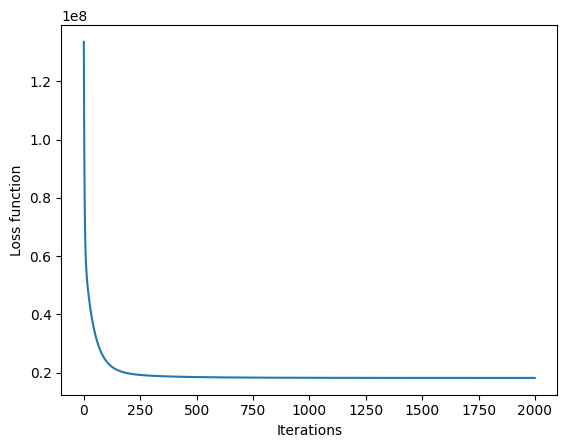

In [23]:
# PLotting the loss values for every training iterations
loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()